# 机器学习练习1 - 线性回归

## 线性回归

用函数一个个讲解

In [1]:
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting


In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [3]:
## 读取数据
path = 'regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head(10) # 返回data中的前几行数据，默认是前5行。  


,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [4]:
data.describe() ## 查看数据的统计信息

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


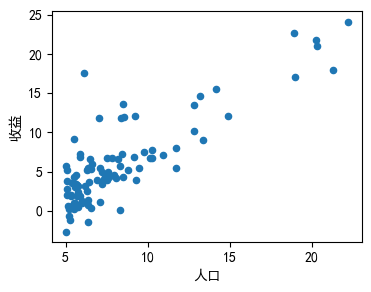

In [5]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

进行数据的归一化和标准化

In [9]:
from sklearn.preprocessing import StandardScaler#从sklearn库中导入标准化函数
scaler = StandardScaler()
data=pd.DataFrame(scaler.fit_transform(data))
data.head()#查看数据

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

进行数据清洗和数据预处理

In [10]:
data.insert(0, 'Ones', 1)#让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

ValueError: cannot insert Ones, already exists

In [11]:
np.random.seed(42)

In [12]:
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)
train_data = train_data.reset_index(drop=True)#索引重置
test_data=test_data.reset_index(drop=True)

In [13]:
cols = train_data.shape[1]#对测试数据进行预处理
X_train_data = train_data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y_train_data = train_data.iloc[:,cols-1]#X是所有行，最后一列
X_train_data=X_train_data.values#将dataframe转化为array
y_train_data=(y_train_data.values).reshape(-1,1)

In [14]:
cols = test_data.shape[1]#对验证数据进行预处理
X_test_data = test_data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y_test_data = test_data.iloc[:,cols-1]#X是所有行，最后一列
X_test_data=X_test_data.values#将dataframe转化为array
y_test_data=(y_test_data.values).reshape(-1,1)

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。 

首先，我们将创建一个以参数$w$为特征函数的代价函数并且采用L2正则
$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{f}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}+\frac{\lambda}{2} \|\mathbf{w}\|_2^2 $$
其中：$${{f}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}$$ 
注意：这里所有的样本$x_0$都为1

从数据中分离出特征属性X和目标向量Y，并对模型参数进行初始化，同时计算当前的损失。

观察下 X (训练集) and y (目标变量)是否正确.

In [15]:
X_train_data#观察训练数据

array([[ 1.        ,  3.40768709],
       [ 1.        , -0.71506051],
       [ 1.        , -0.74142494],
       [ 1.        , -0.44941614],
       [ 1.        , -0.77181546],
       [ 1.        ,  0.4179087 ],
       [ 1.        ,  2.80507153],
       [ 1.        ,  0.92163816],
       [ 1.        , -0.63614904],
       [ 1.        , -0.53240565],
       [ 1.        , -0.40790839],
       [ 1.        , -0.41868794],
       [ 1.        , -0.61258989],
       [ 1.        ,  1.21255602],
       [ 1.        , -0.08704158],
       [ 1.        , -0.5974206 ],
       [ 1.        , -0.69344947],
       [ 1.        , -0.63009691],
       [ 1.        , -0.80532297],
       [ 1.        , -0.24257874],
       [ 1.        , -0.68007244],
       [ 1.        ,  0.51331417],
       [ 1.        , -0.69103381],
       [ 1.        , -0.72220358],
       [ 1.        , -0.46920894],
       [ 1.        , -0.58910866],
       [ 1.        , -0.80656976],
       [ 1.        , -0.6313437 ],
       [ 1.        ,

In [16]:
y_train_data

array([[ 2.20546125],
       [-0.96365779],
       [-0.70273367],
       [-0.39901874],
       [-1.02793612],
       [ 0.31091421],
       [ 2.04584171],
       [-0.0827714 ],
       [-0.4719147 ],
       [ 2.14398492],
       [ 0.02872512],
       [-1.01104928],
       [-0.72880182],
       [ 1.3976952 ],
       [ 0.16284201],
       [ 0.17953366],
       [-0.28752222],
       [-0.48962791],
       [-0.55050224],
       [-0.45569736],
       [-0.8795009 ],
       [ 0.15337429],
       [-0.87961035],
       [-0.4243572 ],
       [-0.0623401 ],
       [-0.72779849],
       [-0.36895554],
       [-0.9777116 ],
       [ 1.76326954],
       [-0.17401905],
       [ 0.5866638 ],
       [-1.28774381],
       [ 1.61496019],
       [-0.89609221],
       [ 1.10308315],
       [-0.8743201 ],
       [ 2.76422082],
       [-0.23292322],
       [-0.09747464],
       [-0.83197988],
       [ 0.12832771],
       [ 1.12387929],
       [-1.32442894],
       [ 0.2202868 ],
       [-0.08205996],
       [-0

初始化w。

In [17]:
W=np.zeros((X_train_data.shape[1],1))## 初始化W系数矩阵，w 是一个(2,1)矩阵
W

array([[0.],
       [0.]])

看下维度

In [18]:
(X_train_data.shape,y_train_data.shape, W.shape)

((78, 2), (78, 1), (2, 1))

注意***，根据维度，我们写出线性回归的模型：Y=np.dot(X,W) 也就是说  (m,n) @ (n, 1) -> (m, 1),
则线性回归模型写为：$${{f}}\left( X\right)=XW$$
因此，我们定义模型的损失函数为：$$ loss =\frac{(XW-Y)^T(XW-Y)}{2m}+\frac{\lambda}{2}\|\mathbf{W}\|_2^2$$


In [19]:
def computeCost(X, Y, W, R):  
    Y_hat = np.dot(X, W)  
    mse_loss = np.sum((Y_hat - Y) ** 2) / (2 * X.shape[0])  
    reg_loss = R * np.sum(W ** 2) / 2  
    total_loss = mse_loss + reg_loss  
    return total_loss

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right):={{w }_{j}}- \frac{\alpha}{m} X_j^T(f(X)-Y)-\lambda w_j$$

注意：这里 $X_j$代表所有样本第$j$个特征组成的向量，大小为$m\times1$，$f(X)$代表所有样本的预测值, $Y$为所有样本的预测值，大小为$m\times1$。 

写成矩阵的形式：
$${W}:={W}- \alpha dW:=W-\frac{\alpha X^T(f(X)-Y)}{m}-\lambda W$$




In [20]:
def gradientDescent(X, Y, W,R, alpha):  
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
    W += -alpha * dW-R*W
    return W

In [21]:
def linearRegression(x_train,y_train,x_test,y_test,alpha,R, iters):
    train_loss_his = []
    test_loss_his=[]
    # step1: initialize the model parameters
    feature_dim = x_train.shape[1]
    W=np.zeros((2,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(x_train,y_train,W,R)
        train_loss_his.append(loss)
        loss=computeCost(x_test,y_test,W,R)
        test_loss_his.append(loss)
        # step3: using the gradient decent method to update the parameters 
        W=gradientDescent(x_train, y_train, W,R, alpha)#梯度更新
    return train_loss_his,test_loss_his,W ## 返回损失和模型参数。
    

In [22]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre



In [23]:
alpha =0.01
iters = 10000
R=0.001
train_loss_his,test_loss_his, W1 = linearRegression(X_train_data,y_train_data,X_test_data,y_test_data, alpha,R, iters)

In [24]:
W1

array([[-0.0098708 ],
       [ 0.72556531]])

In [26]:
W2=np.linalg.inv(np.dot(X_train_data.T,X_train_data))@X_train_data.T@y_train_data  

In [27]:
W2

array([[-0.00894381],
       [ 0.81127149]])

In [57]:
train_loss_his

[0.4272673003677443,
 0.42255768764679047,
 0.4179323825676769,
 0.41338983542766444,
 0.408928525431688,
 0.4045469601486424,
 0.40024367497794827,
 0.3960172326261997,
 0.3918662225937028,
 0.3877892606707176,
 0.3837849884432219,
 0.3798520728080107,
 0.37598920549696113,
 0.3721951026102843,
 0.3684685041585942,
 0.36480817361362977,
 0.3612128974674612,
 0.3576814848000244,
 0.3542127668548218,
 0.3508055966226372,
 0.3474588484331129,
 0.34417141755403685,
 0.3409422197981988,
 0.3377701911376673,
 0.3346542873253498,
 0.33159348352369716,
 0.3285867739404159,
 0.3256331714710581,
 0.3227317073483554,
 0.3198814307981724,
 0.3170814087019521,
 0.31433072526553096,
 0.3116284816942025,
 0.308973795873913,
 0.30636580205846986,
 0.303803650562652,
 0.3012865074611088,
 0.2988135542929375,
 0.2963839877718333,
 0.29399701950170587,
 0.2916518756976571,
 0.289347796912222,
 0.28708403776676983,
 0.2848598666879695,
 0.2826745656492235,
 0.28052742991697505,
 0.278417767801798,
 0.276

In [58]:
test_loss_his

[0.33572510818226026,
 0.3330259795762832,
 0.3303714513889254,
 0.3277607348118307,
 0.32519305558037387,
 0.3226676536989539,
 0.32018378317154983,
 0.3177407117374381,
 0.3153377206119704,
 0.3129741042323161,
 0.31064917000807085,
 0.3083622380766401,
 0.3061126410633029,
 0.30389972384586705,
 0.30172284332382654,
 0.2995813681919341,
 0.29747467871810396,
 0.2954021665255611,
 0.2933632343791544,
 0.29135729597575505,
 0.2893837757386594,
 0.2874421086159199,
 0.2855317398825288,
 0.28365212494637904,
 0.2818027291579312,
 0.279983027623513,
 0.27819250502218357,
 0.27643065542609085,
 0.2746969821242586,
 0.2729909974497333,
 0.2713122226100282,
 0.26966018752080045,
 0.26803443064269933,
 0.26643449882132375,
 0.2648599471302301,
 0.2633103387169307,
 0.26178524465182695,
 0.2602842437800173,
 0.2588069225759293,
 0.2573528750007179,
 0.2559217023623775,
 0.25451301317851666,
 0.2531264230417428,
 0.2517615544876084,
 0.2504180368650667,
 0.24909550620939222,
 0.247793605117515

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

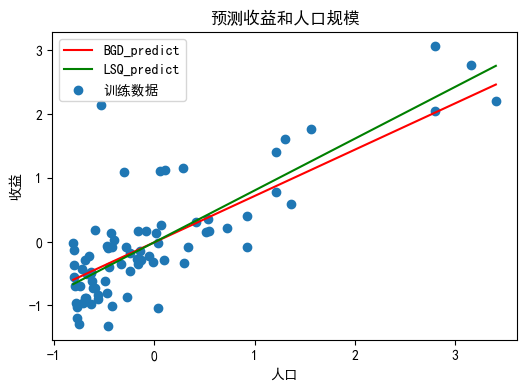

In [28]:
x = np.linspace(X_train_data[:,1].min(), X_train_data[:,1].max(), 100)
f1 = W1[0, 0] + (W1[1, 0] * x)
f2=W2[0, 0] + (W2[1, 0] * x)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f1, 'r', label='BGD_predict')
ax.plot(x, f2, 'g', label='LSQ_predict')
ax.scatter(X_train_data[:,1], y_train_data, label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

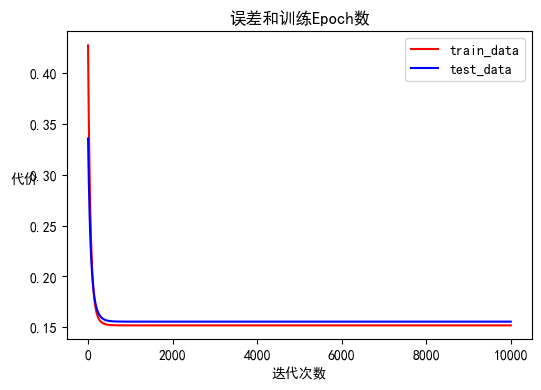

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), train_loss_his, 'r',label='train_data')
ax.plot(np.arange(iters), test_loss_his, 'b',label='test_data')

ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
ax.legend()
plt.show()

## 单变量线性回归

用类来实现

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.